In [ ]:
import os
import json
import pickle
import numpy as np
import pandas as pd

In [25]:
# untar files
root_dir = '/data2/jupiter/datasets/coyo-700m-webdataset'
I, J = 18000, 21750
s = ''
for M in range(I, J, 150):
    N = M + 150
    target_dir = f'tar_{M}_{N}'
    s += f'mkdir {target_dir}\n'
    for i in range(M, N):
        s += f'mv {str(i).zfill(5)}.tar {target_dir}\n'
        s += f'cd {target_dir}\n'
        s += f'tar xf {str(i).zfill(5)}.tar\n'
        s += f'rm {str(i).zfill(5)}.tar\n'
        s += f'cd ..\n'
        s += f'echo processed {str(i).zfill(5)}.tar\n'
    with open(os.path.join(root_dir, 'tar_files3.sh'), 'w') as f:
        f.write(s)

In [28]:
# check corrupted files
data_dir = f'/data2/jupiter/datasets/coyo-700m-webdataset/'
for i in range(20250, 21750, 150):
    jpg_dir = os.path.join(data_dir, f'tar_{i}_{int(i)+150}')
    ds_csv = os.path.join(data_dir, f'tar_{i}_{int(i)+150}_corrupted.csv')
    df = pd.read_csv(ds_csv)
    bad_df = df[df.corrupted == True]
    print(i, bad_df.shape)
    if len(bad_df) > 0:
        for _,row in bad_df.iterrows():
            os.remove(os.path.join(jpg_dir, row['img']))
            print(f"removed {row['img']}")

20250 (2, 2)
removed 202899904.jpg
removed 203530908.jpg
20400 (1, 2)
removed 205351804.jpg
20550 (2, 2)
removed 206809993.jpg
removed 206319122.jpg
20700 (3, 2)
removed 208228979.jpg
removed 207176051.jpg
removed 208238020.jpg
20850 (0, 2)
21000 (2, 2)
removed 210405830.jpg
removed 210517857.jpg
21150 (1, 2)
removed 212666330.jpg
21300 (1, 2)
removed 213168378.jpg
21450 (0, 2)
21600 (13, 2)
removed 216174164.jpg
removed 216230185.jpg
removed 216164201.jpg
removed 216089987.jpg
removed 216212676.jpg
removed 216109772.jpg
removed 216183610.jpg
removed 216146390.jpg
removed 216129003.jpg
removed 216203234.jpg
removed 216155450.jpg
removed 216221557.jpg
removed 216119453.jpg


In [31]:
# generate soft links
data_dir = f'/data2/jupiter/datasets/coyo-700m-webdataset/'
s = ''
for i in range(0, 21750, 150):
    s += f'ln -s /data2/jupiter/datasets/coyo-700m-webdataset/tar_{i}_{i+150} coyo_{i}_{i+150}\n'
with open('./softlink.sh', 'a') as f:
    f.write(s)

In [ ]:
data_dir = '/data3/jupiter/datasets/large_datasets'
dataset_prefix = 'Jupiter_al_phase3_pool_pt'
for i in range(60):
    dataset_dir = os.path.join(data_dir, dataset_prefix+str(i))
    images_jpg = os.path.join(dataset_dir, 'images_jpg')
    if os.path.isdir(images_jpg):
        # print(i, len(os.listdir(images_jpg)))
        print(f'ln -s ../{dataset_prefix}{i}/images_jpg rev1_pt{i}')

In [ ]:
data_dir = '/data3/jupiter/datasets/large_datasets'
datasets = [
    'halo_data_pool_pt0_2023_month050607',
    'halo_data_pool_pt1_2023_month08',
    'halo_data_pool_pt2_2023_month09',
    'halo_data_pool_pt3_2023_month10',
    'halo_data_pool_pt4_2023_month11',
    'halo_data_pool_pt5_2023_month12_2024_month0102',
    'halo_data_pool_pt6_2024_month0304',
    'halo_data_pool_pt7_2024_month0506',
    'halo_data_pool_pt8_2024_month0708',
    'halo_data_pool_pt9_2024_month09',
]
for ds in datasets:
    ds_csv = os.path.join(data_dir, ds, 'corrupted.csv')
    df = pd.read_csv(ds_csv)
    print(ds, df[df.corrupted == True].shape)

## Look into COYO-300M labels

In [7]:
data_dir = f'/data2/jupiter/datasets/coyo-700m-webdataset/'

In [7]:
i = 0
out_parquet = f'{str(i).zfill(5)}.parquet'
out_df = pd.read_parquet(os.path.join(data_dir, out_parquet))
print(out_df.shape)
out_df.sample(2)

(10000, 17)

In [15]:
i = 0
out_json = f'{str(i).zfill(5)}_stats.json'
with open(os.path.join(data_dir, out_json), 'r') as file:
    data = json.load(file)
print(type(data), data.keys())

<class 'dict'> dict_keys(['count', 'successes', 'failed_to_download', 'failed_to_resize', 'duration', 'start_time', 'end_time', 'status_dict'])


In [11]:
# pickle label file!
pickle_file = os.path.join(data_dir, 'imagenet21k_tree.pickle')
with open(pickle_file, 'rb') as f:
    data = pickle.load(f)
print(type(data), data.keys())

<class 'dict'> dict_keys(['class_list', 'class_description', 'class_tree_list', 'class_word', 'class_tree_word'])


In [19]:
len(data['class_list'])

21841

In [20]:
p = os.path.join(data_dir, 'snappy.parquets', 'part-00127-17da4908-939c-46e5-91d0-15f256041956-c000.snappy.parquet')
df = pd.read_parquet(p)
df.shape

(5836074, 17)

In [22]:
from datasets import list_datasets

ModuleNotFoundError: No module named 'datasets'

## Test Pytorch's DatasetFolder

In [16]:
from PIL import Image
from torchvision.datasets import DatasetFolder

In [17]:
def pil_loader(p):
    return Image.open(p).convert("RGB")

In [18]:
root = '/data2/jupiter/datasets/public_datasets/small_ds'
data = DatasetFolder(root, loader=pil_loader, extensions=["jpg"])

In [19]:
len(data)

167056

In [20]:
img = data[214][0]
type(img), img.size

(PIL.Image.Image, (1024, 576))

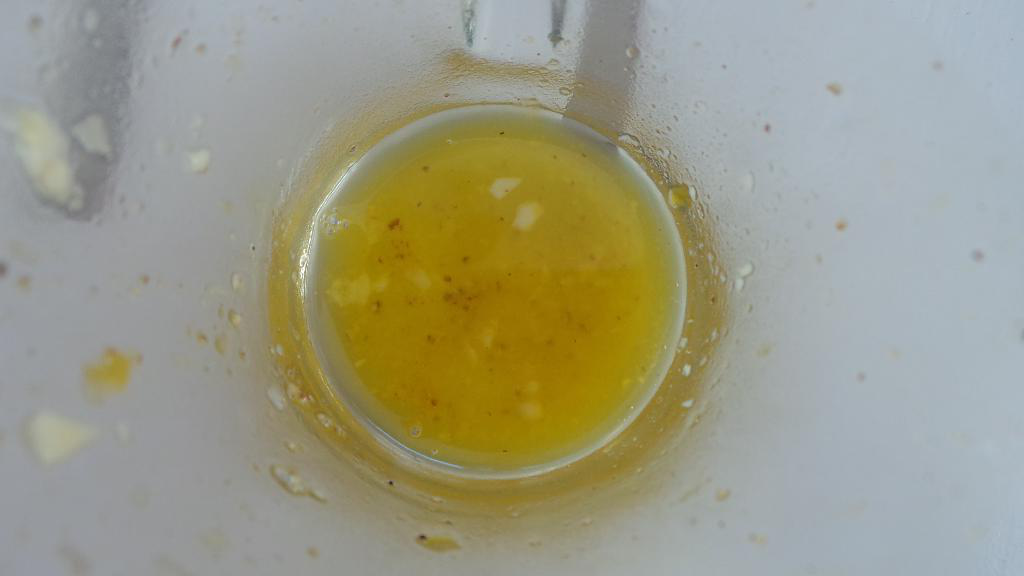

In [21]:
img